In [12]:
import numpy as np
import pandas as pd
import scipy.special as ss
import sys
#sys.path.append('/Users/mwielgus/Works/MyEAT/eat/') #MW macbook
sys.path.append('/home/maciek/Dropbox (Smithsonian External)/EHT/Data/MyEAT/eat/') #drop from PC
from eat.inspect import closures as cl
from eat.io import hops, util
from eat.hops import util as hu
from eat.polcal import polcal
import matplotlib.pyplot as plt

In [13]:
pwd

'/home/maciek/Dropbox (Smithsonian External)/EHT/Data/MyEAT/eat/eat/polcal'

In [5]:
#prepare the data, just low band
reload(cl)
#hi_path = '/Users/mwielgus/Works/DataWork/ReleaseE1B/HOPSRAW/hops/er1-hops-hi/5.+close/data/alist.v6.5s'
#hops_hi = hops.read_alist(hi_path)
lo_path = '/Users/mwielgus/Works/DataWork/ReleaseE1B/HOPSRAW/hops/er1-hops-lo/5.+close/data/alist.v6.5s'
hops_lo = hops.read_alist(lo_path)
#hops_hi = cl.add_band(hops_hi,'hi')
hops_lo= cl.add_band(hops_lo,'lo')
hopsD = hops_lo

In [8]:
#let's just take first night, throw out autocorrelations and cross polarizations
fooH = hopsD[hopsD.expt_no==3597]
#fooH = fooH[fooH.scan_id=='No0001']
fooH = fooH[map(lambda x: x[0]!=x[1], fooH.baseline)]
fooH = fooH[map(lambda x: x[0]==x[1], fooH.polarization)]
#hopsD_ord_50 = cl.coh_average_vis(hopsD_ord,50.)

#adding field rotation to our data frame
fooH = polcal.add_total_field_rotation(fooH)

In [9]:
#let's solve for gains for source = sour
reload(polcal)
sour = 'OJ287'
hopsDd = hopsD[hopsD.expt_no==3597]
hopsDd = hopsDd[map(lambda x: x[0]!=x[1], hopsDd.baseline)]
hopsDd = hopsDd[map(lambda x: x[0]==x[1], hopsDd.polarization)]
#hopsDd = hopsDd[map(lambda x: 'S' not in x, hopsDd.baseline)]
#hopsDd = hopsD[(hopsD.scan_id=='No0013')|(hopsD.scan_id=='No0014')]
src_sc_list = list(set(zip(hopsDd.source,hopsDd.scan_id)))
sc_list = [x for x in src_sc_list if x[0]==sour]
scan_id_list = [x[1] for x in sc_list]
list_stations_tot = list(set(''.join(list(set(hopsDd.baseline)))))
foo_columns = sorted(map(lambda x: x+'_amp',list_stations_tot)+map(lambda x: x+'_phas',list_stations_tot))
columns = ['datetime','scan_id']+foo_columns
Ratios = pd.DataFrame(columns=columns)
#Ratios['scan_id']= scan_id_list
for cou in range(len(sc_list)):
    local_scan_id = sc_list[cou][1] 
    print(local_scan_id)
    fooHloc = hopsDd[hopsDd.scan_id==local_scan_id]
    fooHloc = polcal.add_total_field_rotation(fooHloc)
    amp, pha, list_stations_loc = polcal.solve_amp_ratio(fooHloc,weightsA=True,weightsP=True)
    print(list_stations_loc)
    print(amp)
    print(pha)
    Ratios_loc = pd.DataFrame(columns=columns)
    Ratios_loc['scan_id'] = [local_scan_id]
    Ratios_loc['datetime'] = [min(fooHloc.datetime)]
    for cou_st in range(len(list_stations_loc)):
        stat = list_stations_loc[cou_st]
        Ratios_loc[stat+'_amp'] = amp[cou_st]
        Ratios_loc[stat+'_phas'] = pha[cou_st]
    Ratios = pd.concat([Ratios,Ratios_loc],ignore_index=True)


No0006


/Users/mwielgus/Works/MyEAT/eat/eat/polcal/polcal.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  alist['par1'] = par1
/Users/mwielgus/Works/MyEAT/eat/eat/polcal/polcal.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  alist['par2'] = par2
/Users/mwielgus/anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

['A', 'L', 'P', 'X', 'Z']
[ 1.05217455  1.03126284  0.88715589  1.00623367  0.99186186]
[ 158.20071647  146.90196457  244.34926213  265.46558358   85.08234974]
No0013
['A', 'L', 'P', 'Z']
[ 1.04049567  1.04396091  0.92800219  1.01954728]
[ 179.68041378  168.48292138  265.12088929  106.71617458]
No0003
['A', 'P', 'X', 'Z']
[ 1.07683432  0.97005625  0.98212825  0.92145856]
[ 150.44663091  235.80582009  258.87803748   74.86931072]
No0008
['A', 'P', 'X', 'Z']
[ 1.06715674  0.92314069  0.99102955  0.98236356]
[ 149.00641679  241.64749599  255.74776396   73.59930299]
No0019
['A', 'S', 'X', 'Z']
[ 1.03694909  1.15423706  1.01291017  1.04529019]
[ 198.27225836  100.35383548  303.78198848  117.59059603]
No0011
['A', 'P', 'Z']
[ 0.90893271  1.10457945  1.17035653]
[ 175.50828018  263.81230806  100.67880196]
No0018
['A', 'P', 'S', 'X', 'Z']
[ 1.00888143  0.91752352  1.17889484  1.04116736  1.06867758]
[ 174.91217894  262.45508164   86.09230786  280.20253662   96.33848477]
No0004
['A', 'L', 'P', '

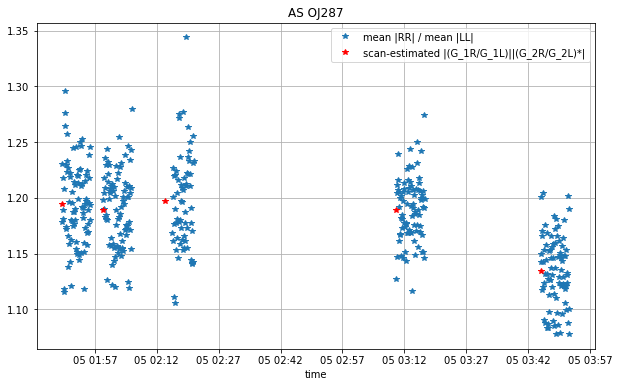

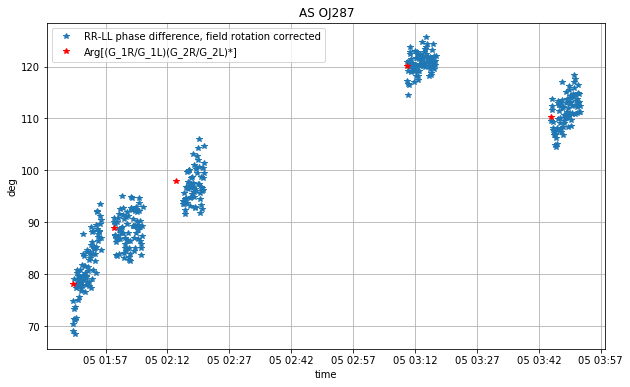

In [10]:
#INSPECT WHETHER CALCULATED GAINS ACCOUNT FOR RR-LL differences
sour='OJ287'; base='AS'
hopsDdbs=hopsDd[(hopsDd.source==sour)&(hopsDd.baseline==base)]
fooR, fooL = cl.match_2_bsp_frames(hopsDdbs,hopsDdbs,match_what='polarization',dt = 0.5,what_is_same='baseline')
fooR = fooR.sort_values(['datetime','baseline'])
fooL = fooL.sort_values(['datetime','baseline'])
fooR = polcal.add_total_field_rotation(fooR)
plt.figure(figsize=(10,6))
plt.plot(fooR.datetime,np.asarray(fooR.amp)/np.asarray(fooL.amp),'*',label='mean |RR| / mean |LL|')
amp1 = base[0]+'_amp'; amp2 = base[1]+'_amp';
plt.plot(Ratios.datetime,np.asarray(Ratios[amp1])*np.asarray(Ratios[amp2]),'r*',label='scan-estimated |(G_1R/G_1L)||(G_2R/G_2L)*|')
plt.grid()
plt.title(base+' '+sour)
[x1,x2,y1,y2]=plt.axis()
#plt.axis([x1,x2,0.8,1.2])
plt.legend()
plt.xlabel('time')
#plt.ylabel('deg')
plt.show()

plt.figure(figsize=(10,6))
phas_data = np.mod(np.asarray(fooR.resid_phas)-np.asarray(fooL.resid_phas)+fooR.tot_fra,360)
plt.plot(fooR.datetime,phas_data,'*',label='RR-LL phase difference, field rotation corrected')
#plt.plot(fooR.datetime,np.mod(np.asarray(fooR.resid_phas)-np.asarray(fooL.resid_phas),360),'*')
#plt.plot(fooR.datetime,np.mod(-fooR.tot_fra,360),'*')
pha1 = base[0]+'_phas'; pha2 = base[1]+'_phas';
plt.plot(Ratios.datetime,np.mod(np.asarray(Ratios[pha1])-np.asarray(Ratios[pha2]),360),'r*',label='Arg[(G_1R/G_1L)(G_2R/G_2L)*]')
plt.grid()
plt.title(base+' '+sour)
plt.legend()
plt.xlabel('time')
plt.ylabel('deg')
#[x1,x2,y1,y2]=plt.axis()
#plt.axis([x1,x2,0.8,1.2])
plt.show()

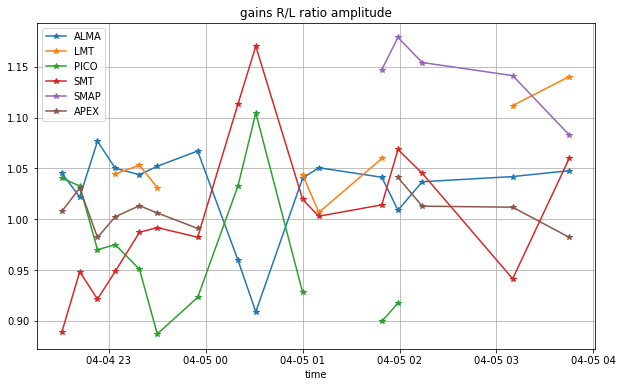

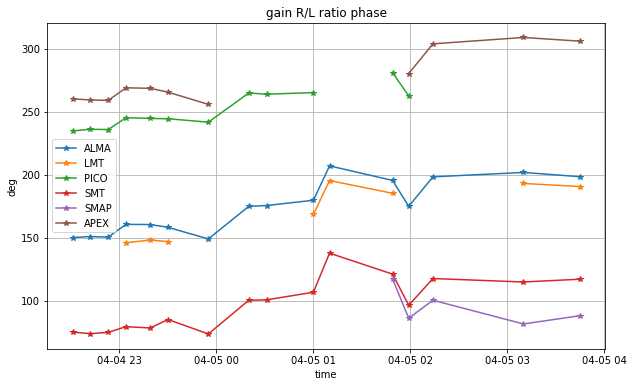

In [12]:
#NOW LET'S SEE THE STATION GAINS RATIOS SCAN AFTER SCAN
Ratios = Ratios.sort_values('datetime')
plt.figure(figsize=(10,6))
plt.plot(Ratios.datetime, Ratios.A_amp,'*-',label='ALMA')
plt.plot(Ratios.datetime, Ratios.L_amp,'*-',label='LMT')
plt.plot(Ratios.datetime, Ratios.P_amp,'*-',label='PICO')
plt.plot(Ratios.datetime, Ratios.Z_amp,'*-',label='SMT')
plt.plot(Ratios.datetime, Ratios.S_amp,'*-',label='SMAP')
plt.plot(Ratios.datetime, Ratios.X_amp,'*-',label='APEX')
plt.grid()
plt.legend()
plt.title('gains R/L ratio amplitude')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(Ratios.datetime, Ratios.A_phas,'*-',label='ALMA')
plt.plot(Ratios.datetime, Ratios.L_phas,'*-',label='LMT')
plt.plot(Ratios.datetime, Ratios.P_phas,'*-',label='PICO')
plt.plot(Ratios.datetime, Ratios.Z_phas,'*-',label='SMT')
plt.plot(Ratios.datetime, Ratios.S_phas,'*-',label='SMAP')
plt.plot(Ratios.datetime, Ratios.X_phas,'*-',label='APEX')
plt.grid()
plt.xlabel('time')
plt.ylabel('deg')
plt.title('gain R/L ratio phase')
plt.legend()
plt.show()

In [46]:
reload(polcal)
hopsDd = hopsD[hopsD.expt_no==3597]
hopsDd = hopsDd[map(lambda x: x[0]!=x[1], hopsDd.baseline)]
hopsDd = hopsDd[map(lambda x: x[0]==x[1], hopsDd.polarization)]
fooHloc = hopsDd[hopsDd.scan_id=='No0013']
fooHloc = polcal.add_total_field_rotation(fooHloc)
amp, pha, list_stations_loc = polcal.solve_amp_ratio(fooHloc)
print(list_stations_loc)
print(amp)
print(pha)


12.3411564908
11.2909467686
-85.488435206
-85.488435206
72.773319357
72.5730217533
-92.7452098007
-50.0089217833
-66.3358463117
-65.6923404567
-170.049426899
-170.049426899
['A', 'L', 'P', 'Z']
[ 0.99208702  1.08385418  1.0730466   0.98246863]
[ 179.57706768  180.93664921  256.53301007  102.95316851]


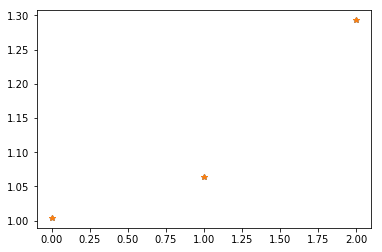

In [165]:
#np.multiply(amp_mat,ans )
predict = np.exp(amp_mat.dot(np.log(ans)))
plt.plot(predict,'*')
plt.plot(amp_vec,'*')
plt.show()

In [194]:
Ratios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 17 to 1
Data columns (total 18 columns):
datetime    19 non-null datetime64[ns]
scan_id     19 non-null object
A_amp       18 non-null object
A_phas      18 non-null object
J_amp       0 non-null object
J_phas      0 non-null object
L_amp       18 non-null object
L_phas      18 non-null object
P_amp       4 non-null object
P_phas      4 non-null object
R_amp       0 non-null object
R_phas      0 non-null object
S_amp       12 non-null object
S_phas      12 non-null object
X_amp       9 non-null object
X_phas      9 non-null object
Z_amp       15 non-null object
Z_phas      15 non-null object
dtypes: datetime64[ns](1), object(17)
memory usage: 2.8+ KB


In [169]:
[all([x==y for (x,y) in zip(fooHR.datetime,fooHL.datetime)]),
 all([x==y for (x,y) in zip(fooHR.baseline,fooHL.baseline)])]
 


[True, True]

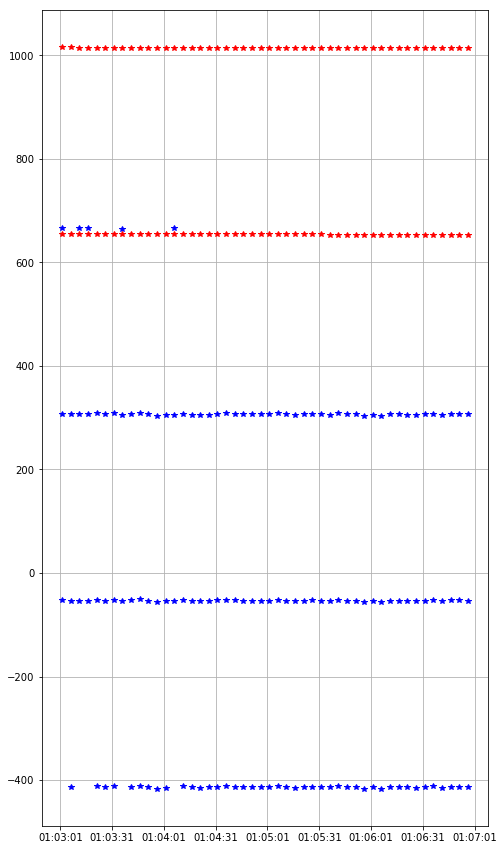

In [34]:
fooH = hopsD[hopsD.expt_no==3597]
fooH=fooH[fooH.scan_id=='No0013']
fooHR = fooH[fooH.polarization=='RR']
fooHL = fooH[fooH.polarization=='LL']
fooHR, fooHL = cl.match_2_bsp_frames(fooH,fooH,match_what='polarization',dt = 0.5,what_is_same='baseline')
fooHR = fooHR.sort_values(['datetime','baseline'])
fooHL = fooHL.sort_values(['datetime','baseline'])

sour = 'OJ287'; base ='AL'
fooHRsb = fooHR[(fooHR.baseline==base)&(fooHR.source==sour)]
fooHLsb = fooHL[(fooHL.baseline==base)&(fooHL.source==sour)]
fooHRsb = polcal.add_total_field_rotation(fooHRsb)
plt.figure(figsize=(8,15))
plt.plot(fooHRsb.datetime, np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas),'*b')
plt.plot(fooHRsb.datetime, 360+np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas),'b*')
plt.plot(fooHRsb.datetime, -360+np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas),'b*')
plt.plot(fooHRsb.datetime,-fooHRsb.tot_fra,'r*')
plt.plot(fooHRsb.datetime,360-fooHRsb.tot_fra,'r*')
plt.grid()
plt.show()

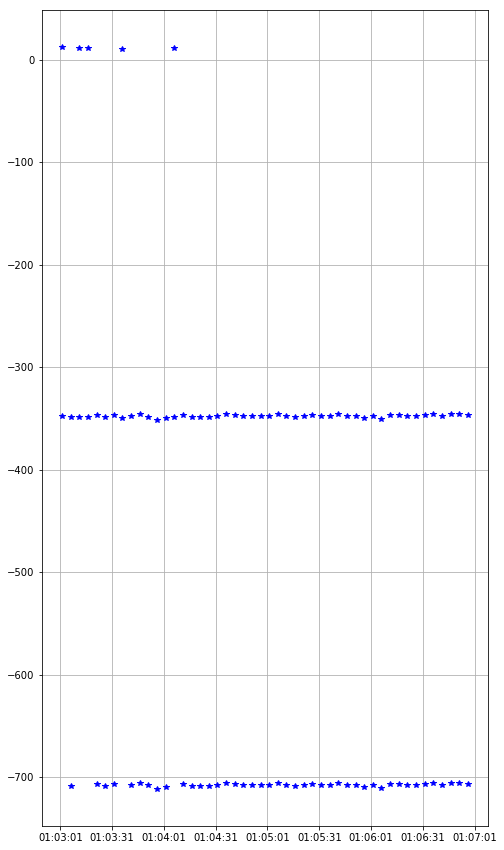

0    -348.085798
1    -708.238451
2    -348.371693
3    -348.780288
4    -706.782423
5    -708.430653
6    -706.372661
7    -349.712924
8    -707.648089
9    -705.768914
10   -708.188733
11   -711.349743
12   -709.255637
13   -348.594600
14   -706.681139
15   -708.586154
16   -709.069344
17   -708.440005
18   -707.243942
19   -706.144327
20   -707.023883
21   -707.791550
22   -707.676568
23   -707.807942
24   -707.776864
25   -705.621935
26   -707.711563
27   -708.917653
28   -707.532923
29   -706.772472
30   -707.595745
31   -707.714021
32   -705.418134
33   -707.340860
34   -707.278052
35   -710.092077
36   -707.523845
37   -710.213113
38   -706.860995
39   -706.928052
40   -707.563883
41   -707.759784
42   -706.991089
43   -705.540619
44   -707.875027
45   -706.063681
46   -706.115011
47   -706.374082
Name: tot_fra, dtype: float64

In [35]:
plt.figure(figsize=(8,15))
plt.plot(fooHRsb.datetime, np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas)- (-fooHRsb.tot_fra),'*b')
plt.plot(fooHRsb.datetime, 360+np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas)- (-fooHRsb.tot_fra),'*b')


#plt.plot(fooHRsb.datetime, 360+np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas),'b*')
#plt.plot(fooHRsb.datetime, -360+np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas),'b*')
#plt.plot(fooHRsb.datetime,-fooHRsb.tot_fra,'r*')
#plt.plot(fooHRsb.datetime,360-fooHRsb.tot_fra,'r*')
plt.grid()
plt.show()
np.asarray(fooHRsb.resid_phas) - np.asarray(fooHLsb.resid_phas)- (-fooHRsb.tot_fra)

In [75]:
reload(polcal)
vec = polcal.cut_outliers(np.asarray(fooHRsb.amp)/np.asarray(fooHLsb.amp),4)

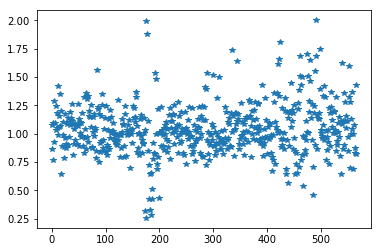

In [77]:
plt.plot(vec,'*')
#plt.plot(np.asarray(fooHRsb.amp)/np.asarray(fooHLsb.amp),'*')
plt.show()

In [80]:
sorted(list(set(fooHR.baseline)))

['AL',
 'AP',
 'AS',
 'AX',
 'AZ',
 'LP',
 'LS',
 'PS',
 'XL',
 'XP',
 'XS',
 'XZ',
 'ZL',
 'ZP',
 'ZS']

In [55]:
aa = np.zeros(5)
aa[0]= np.nan
aa
aa==aa

array([False,  True,  True,  True,  True], dtype=bool)

In [38]:
all(fooHR.polarization==fooHL.polarization)

ValueError: Can only compare identically-labeled Series objects

In [153]:
#calculate paralactic angles on HOPS data
#fooH = hopsD_ord[hopsD_ord.expt_no==3597]
fooH = hopsD[hopsD.expt_no==3597]
fooH = fooH[fooH.source=='OJ287']
#fooH = fooH[fooH.baseline=='LZ']
fooH = fooH[map(lambda x: x[0]!=x[1], fooH.baseline)]
fooH = fooH[map(lambda x: x[0]==x[1], fooH.polarization)]
fooH_pa = polcal.paralactic_angle(fooH)

In [150]:
#read Michael's data
aa = pd.read_table('data_with_fieldrotation.txt',header=None)
fr = pd.DataFrame()
fr['source']=aa[13]
fr['scan_id']=aa[8]
fr['datetime']=map(lambda x: pd.Timestamp(2017,4,int(x[2]),int(x[4:6]),int(x[6:8]),int(x[8:10])),aa[11])
fr['polarization']=aa[17]
fr['baseline']=aa[14]
fr['par1']=aa[22]
fr['par2']=aa[23]
fr['fra1']=aa[24]
fr['fra2']=aa[25]

In [15]:
for base in list(set(fr.baseline)):
    #base='XZ'
    fr_B = fr[(fr.baseline==base)&(fr.source=='OJ287')]
    fooH_paB = fooH_pa[fooH_pa.baseline==base]
    fooH_paB2 = fooH_paB
    reload(polcal)
    fooH_paB = polcal.add_field_rotation(fooH_paB)
    
    plt.figure(figsize=(8,5))
    plt.plot(fooH_paB.datetime,fooH_paB.fra1,'*',label="Maciek's code")
    #plt.plot(fooH_paC.datetime,fooH_paC.fra1,'*')
    plt.plot(fr_B.datetime,fr_B.fra1,'*',label="Michael's file")
    plt.grid()
    plt.title(base+' '+'first')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('deg')
    plt.show()
    
    plt.figure(figsize=(8,5))
    plt.plot(fooH_paB.datetime,fooH_paB.fra2,'*',label="Maciek's code")
    #plt.plot(fooH_paC.datetime,fooH_paC.fra2,'*')
    plt.plot(fr_B.datetime,fr_B.fra2,'*',label="Michael's file")
    plt.grid()
    plt.title(base+' '+'second')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('deg')
    plt.show()

NameError: name 'fr' is not defined

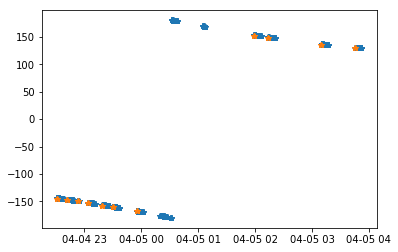

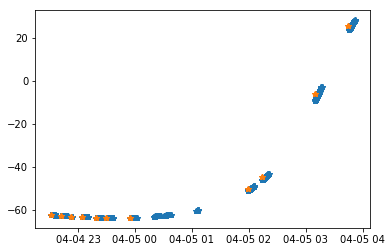

In [286]:
plt.plot(fooH_paB.datetime,(180./np.pi)*fooH_paB.par1,'*')
plt.plot(fr_B.datetime,fr_B.par1,'*')
plt.show()

plt.plot(fooH_paB.datetime,(180./np.pi)*fooH_paB.par2,'*')
plt.plot(fr_B.datetime,fr_B.par2,'*')
plt.show()

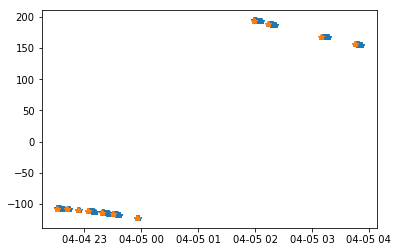

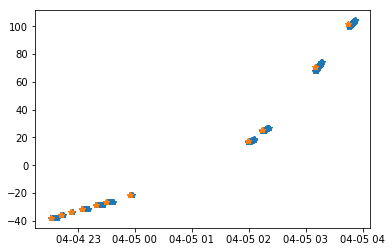

In [155]:
plt.plot(fooH_paB.datetime,fooH_paB.fra1,'*')
#plt.plot(fooH_paC.datetime,fooH_paC.fra1,'*')
plt.plot(fr_B.datetime,fr_B.fra1,'*')
plt.grid()
plt.show()

plt.plot(fooH_paB.datetime,fooH_paB.fra2,'*')
#plt.plot(fooH_paC.datetime,fooH_paC.fra2,'*')
plt.plot(fr_B.datetime,fr_B.fra2,'*')
plt.grid()
plt.show()

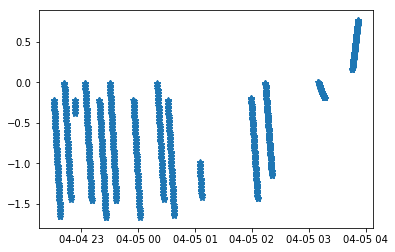

In [303]:
plt.plot(fooH_paB.datetime,fooH_paB.fra2-fooH_paC.fra2,'*')

plt.show()

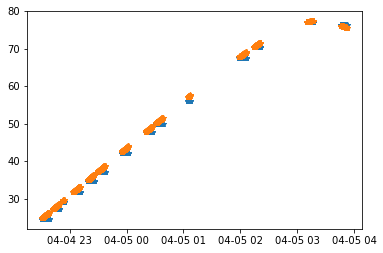

In [288]:
reload(polcal)
fooH_paB2 = fooH_paB
plt.plot(fooH_paB.datetime,fooH_paB.rem_elev,'*')
fooH_paC= polcal.add_computed_elev(fooH_paB2)
fooH_paC = polcal.add_field_rotation(fooH_paC)
plt.plot(fooH_paC.datetime,fooH_paC.rem_elev,'*')
plt.show()


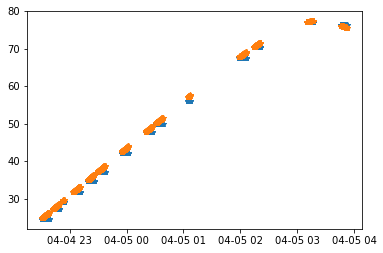

In [300]:
fooH_paB2 = fooH_paB
plt.plot(fooH_paB.datetime,fooH_paB.rem_elev,'*')
#fooH_paC= polcal.add_computed_elev(fooH_paB2)
#fooH_paC = polcal.add_field_rotation(fooH_paC)
plt.plot(fooH_paC.datetime,fooH_paC.rem_elev,'*')
plt.show()

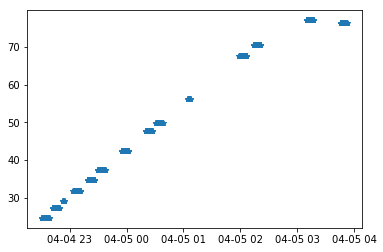

In [299]:
plt.plot(fooH_paB.datetime,fooH_paB.rem_elev,'*')
#fooH_paC= polcal.add_computed_elev(fooH_paB2)
#fooH_paC = polcal.add_field_rotation(fooH_paC)
#plt.plot(fooH_paC.datetime,fooH_paC.rem_elev,'*')
plt.show()

In [298]:
fooH_paC = polcal.add_field_rotation(fooH_paC)

In [323]:
reload(polcal)
fooH2 = fooH
fooH_tfra= polcal.add_total_field_rotation(fooH2)

In [324]:
fooH_tfra

,datetime,version,root_id,two,extent_no,duration,length,offset,expt_no,scan_id,...,noloss_cotime,ra_hrs,dec_deg,resid_delay,band,par1,par2,fra1,fra2,tot_fra
0,2017-04-04 22:31:02,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.514456,-1.088557,-106.547723,-37.699722,137.696002
1,2017-04-04 22:31:07,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.514796,-1.088608,-106.567205,-37.702637,137.729136
2,2017-04-04 22:31:12,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.515136,-1.088659,-106.586694,-37.705548,137.762293
3,2017-04-04 22:31:17,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.515477,-1.088709,-106.606192,-37.708456,137.795472
4,2017-04-04 22:31:22,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.515817,-1.088760,-106.625698,-37.711362,137.828673
5,2017-04-04 22:31:27,6,zpnbqh,2,24,5,4,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.516158,-1.088811,-106.645212,-37.714264,137.861896
6,2017-04-04 22:31:32,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.516498,-1.088861,-106.664734,-37.717163,137.895142
7,2017-04-04 22:31:37,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.516839,-1.088912,-106.684265,-37.720060,137.928409
8,2017-04-04 22:31:42,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.517180,-1.088962,-106.703803,-37.722953,137.961699
9,2017-04-04 22:31:47,6,zpnbqh,2,24,5,5,1,3597,No0001,...,-1,8.913576,20.108511,-0.002315,lo,-2.517521,-1.089013,-106.723350,-37.725844,137.995011


In [328]:
fooH.columns

Index([u'datetime', u'version', u'root_id', u'two', u'extent_no', u'duration',
       u'length', u'offset', u'expt_no', u'scan_id', u'procdate', u'year',
       u'timetag', u'scan_offset', u'source', u'baseline', u'quality',
       u'freq_code', u'polarization', u'lags', u'amp', u'snr', u'resid_phas',
       u'phase_snr', u'datatype', u'sbdelay', u'mbdelay', u'ambiguity',
       u'delay_rate', u'ref_elev', u'rem_elev', u'ref_az', u'rem_az', u'u',
       u'v', u'esdesp', u'epoch', u'ref_freq', u'total_phas', u'total_rate',
       u'total_mbdelay', u'total_sbresid', u'srch_cotime', u'noloss_cotime',
       u'ra_hrs', u'dec_deg', u'resid_delay', u'band'],
      dtype='object')

In [329]:
fooH2 = fooH

In [331]:
fooH

,datetime,version,root_id,two,extent_no,duration,length,offset,expt_no,scan_id,...,total_phas,total_rate,total_mbdelay,total_sbresid,srch_cotime,noloss_cotime,ra_hrs,dec_deg,resid_delay,band
0,2017-04-04 22:31:02,6,zpnbqh,2,24,5,5,1,3597,No0001,...,84.959763,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
1,2017-04-04 22:31:07,6,zpnbqh,2,24,5,5,1,3597,No0001,...,262.097961,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
2,2017-04-04 22:31:12,6,zpnbqh,2,24,5,5,1,3597,No0001,...,258.004700,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
3,2017-04-04 22:31:17,6,zpnbqh,2,24,5,5,1,3597,No0001,...,208.650070,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
4,2017-04-04 22:31:22,6,zpnbqh,2,24,5,5,1,3597,No0001,...,38.486996,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
5,2017-04-04 22:31:27,6,zpnbqh,2,24,5,4,1,3597,No0001,...,275.222107,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
6,2017-04-04 22:31:32,6,zpnbqh,2,24,5,5,1,3597,No0001,...,350.420105,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
7,2017-04-04 22:31:37,6,zpnbqh,2,24,5,5,1,3597,No0001,...,159.653320,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
8,2017-04-04 22:31:42,6,zpnbqh,2,24,5,5,1,3597,No0001,...,61.780457,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo
9,2017-04-04 22:31:47,6,zpnbqh,2,24,5,5,1,3597,No0001,...,341.914917,-0.502105,3992.250256,0.000000,-1,-1,8.913576,20.108511,-0.002315,lo


In [334]:
fooH.columns

Index([u'datetime', u'version', u'root_id', u'two', u'extent_no', u'duration',
       u'length', u'offset', u'expt_no', u'scan_id', u'procdate', u'year',
       u'timetag', u'scan_offset', u'source', u'baseline', u'quality',
       u'freq_code', u'polarization', u'lags', u'amp', u'snr', u'resid_phas',
       u'phase_snr', u'datatype', u'sbdelay', u'mbdelay', u'ambiguity',
       u'delay_rate', u'ref_elev', u'rem_elev', u'ref_az', u'rem_az', u'u',
       u'v', u'esdesp', u'epoch', u'ref_freq', u'total_phas', u'total_rate',
       u'total_mbdelay', u'total_sbresid', u'srch_cotime', u'noloss_cotime',
       u'ra_hrs', u'dec_deg', u'resid_delay', u'band', u'par1', u'par2',
       u'fra1', u'fra2', u'tot_fra'],
      dtype='object')

In [333]:
fooH_tfra= polcal.add_total_field_rotation(fooH2)

In [220]:
reload(polcal)
polcal.cut_outliers_circ(np.asarray([180,180,180,180,180,179,181,50]),1)

38.2374422556
[   6.87134216    6.87134216    6.87134216    6.87134216    6.87134216
    5.87134216    7.87134216  123.12865784]


array([180, 180, 180, 180, 180, 179, 181])

In [4]:
set(hopsD.source)

{'1055+018',
 '1749+096',
 '1921-293',
 '3C273',
 '3C279',
 '3C454.3',
 '3C84',
 'BLLAC',
 'CENA',
 'CTA102',
 'CYGX-3',
 'J0006-0623',
 'J0132-1654',
 'J1733-1304',
 'J1924-2914',
 'NGC1052',
 'OJ287'}

In [5]:
hopsD[hopsD.source=='CYGX-3']

,datetime,version,root_id,two,extent_no,duration,length,offset,expt_no,scan_id,...,total_phas,total_rate,total_mbdelay,total_sbresid,srch_cotime,noloss_cotime,ra_hrs,dec_deg,resid_delay,band
133625,2017-04-05 15:58:02,6,zqbxpq,2,7,5,5,1,3597,No0096,...,95.535179,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133626,2017-04-05 15:58:07,6,zqbxpq,2,7,5,5,1,3597,No0096,...,104.771332,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133627,2017-04-05 15:58:12,6,zqbxpq,2,7,5,5,1,3597,No0096,...,98.900749,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133628,2017-04-05 15:58:17,6,zqbxpq,2,7,5,5,1,3597,No0096,...,97.816521,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133629,2017-04-05 15:58:22,6,zqbxpq,2,7,5,5,1,3597,No0096,...,99.569283,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133630,2017-04-05 15:58:27,6,zqbxpq,2,7,5,5,1,3597,No0096,...,106.156517,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133631,2017-04-05 15:58:32,6,zqbxpq,2,7,5,5,1,3597,No0096,...,80.748169,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133632,2017-04-05 15:58:37,6,zqbxpq,2,7,5,5,1,3597,No0096,...,97.529480,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133633,2017-04-05 15:58:42,6,zqbxpq,2,7,5,5,1,3597,No0096,...,104.767418,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
133634,2017-04-05 15:58:47,6,zqbxpq,2,7,5,5,1,3597,No0096,...,94.421059,6.900000e-07,-0.024392,-0.0,-1,-1,20.540491,40.957752,0.002455,lo
